In [2]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_9_3.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [4]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_9_3.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 2s - loss: 0.2917 - accuracy: 0.8819 - val_loss: 0.2531 - val_accuracy: 0.8950
Epoch 2/100
100000/100000 - 1s - loss: 0.2446 - accuracy: 0.8973 - val_loss: 0.2349 - val_accuracy: 0.9011
Epoch 3/100
100000/100000 - 1s - loss: 0.2224 - accuracy: 0.9052 - val_loss: 0.2114 - val_accuracy: 0.9093
Epoch 4/100
100000/100000 - 1s - loss: 0.1974 - accuracy: 0.9142 - val_loss: 0.1826 - val_accuracy: 0.9208
Epoch 5/100
100000/100000 - 1s - loss: 0.1711 - accuracy: 0.9240 - val_loss: 0.1631 - val_accuracy: 0.9271
Epoch 6/100
100000/100000 - 1s - loss: 0.1504 - accuracy: 0.9321 - val_loss: 0.1444 - val_accuracy: 0.9349
Epoch 7/100
100000/100000 - 1s - loss: 0.1322 - accuracy: 0.9405 - val_loss: 0.1291 - val_accuracy: 0.9412
Epoch 8/100
100000/100000 - 2s - loss: 0.1196 - accuracy: 0.9469 - val_loss: 0.1189 - val_accuracy: 0.9476
Epoch 9/100
100000/100000 - 2s - loss: 0.1081 - accuracy: 0.9528 - val_loss: 0.1088 - val_accu

Epoch 77/100
100000/100000 - 1s - loss: 0.0110 - accuracy: 0.9960 - val_loss: 0.0352 - val_accuracy: 0.9911
Epoch 78/100
100000/100000 - 1s - loss: 0.0123 - accuracy: 0.9956 - val_loss: 0.0360 - val_accuracy: 0.9903
Epoch 79/100
100000/100000 - 1s - loss: 0.0108 - accuracy: 0.9961 - val_loss: 0.0353 - val_accuracy: 0.9908
Epoch 80/100
100000/100000 - 1s - loss: 0.0106 - accuracy: 0.9962 - val_loss: 0.0349 - val_accuracy: 0.9905
Epoch 81/100
100000/100000 - 1s - loss: 0.0114 - accuracy: 0.9960 - val_loss: 0.0349 - val_accuracy: 0.9908
Epoch 82/100
100000/100000 - 1s - loss: 0.0119 - accuracy: 0.9957 - val_loss: 0.0378 - val_accuracy: 0.9906
Epoch 83/100
100000/100000 - 1s - loss: 0.0136 - accuracy: 0.9952 - val_loss: 0.0365 - val_accuracy: 0.9905
Epoch 84/100
100000/100000 - 1s - loss: 0.0119 - accuracy: 0.9957 - val_loss: 0.0313 - val_accuracy: 0.9915
Epoch 85/100
100000/100000 - 1s - loss: 0.0114 - accuracy: 0.9959 - val_loss: 0.0342 - val_accuracy: 0.9908
Epoch 86/100
100000/100000 -

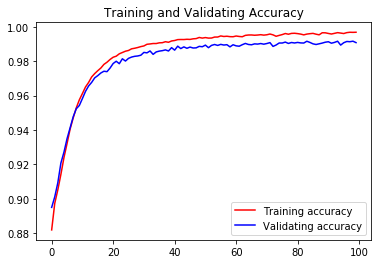

In [7]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [8]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_9_3_model.h5')